In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

"""
A popular pattern for CNN follows as:

The 1st layer of a CNN is always a convolutional layer.
Convolutional layer converts all the pixels in its receptive field to a single value by performing a dot product
(summing the element-wise multiplication of the input data and the filter/kernel of the convolution layer)
the filter slides over the input to transform to a different matrix



Pooling layer commonly follows after the convolutional layer. 
It reduces the spatial dimension of the feature maps to min the number of parameters and computations in the network.
It provides translational invariance, even if the input is translated (rotated) it can still recognise the feature.
It slides a filter over the input and calculate an input on the receptive field

A dense layer is added last as the layer in order to performan classification.
To do so, you must first convert the multi-dimensional matix output of the convolutional layer to a 1D matrix by unrolling
A dense layer is a deeply connected layer where every neuron is connected to every neuron of the preceding layer.
Each neuron in the dense layer performan matrix-vector multiplication
"""

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


# Convolutional base using the pattern of conv2d and maxpooling2d layers
# 2D convolution layer slide filters to 2D input
# Max pooling selects the max value from every pool - retains the most prominent features of the feature map, returns a sharper image
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10))

# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4900 - accuracy: 0.4579 - val_loss: 1.2481 - val_accuracy: 0.5468
Epoch 2/10
1563/1563 [==============================] - 40s 26ms/step - loss: 1.1143 - accuracy: 0.6075 - val_loss: 1.0237 - val_accuracy: 0.6375
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9543 - accuracy: 0.6659 - val_loss: 0.9480 - val_accuracy: 0.6704
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.8610 - accuracy: 0.6980 - val_loss: 0.8796 - val_accuracy: 0.6963
Epoch 5/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7910 - accuracy: 0.7222 - val_loss: 0.8983 - val_accuracy: 0.6894
Epoch 6/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7311 - accuracy: 0.7439 - val_loss: 0.8574 - val_accuracy: 0.7066
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6834 - accuracy: 0.7606 - val_loss: 0.8628 -

313/313 - 4s - loss: 0.8680 - accuracy: 0.7150 - 4s/epoch - 12ms/step


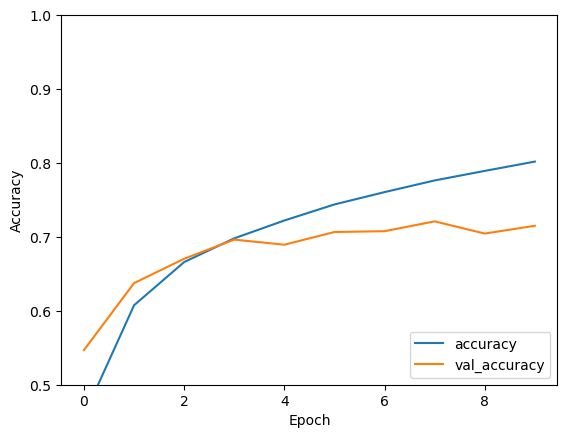

In [8]:
# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [9]:
print(test_acc)

0.7149999737739563
